# GRIP TASK-2

# Prediction using Unsupervised ML 

In [4]:
#import the library
import pandas as pd #data manipuation
import numpy as np  #linear algebra
import seaborn as sns  #stastics 
import matplotlib.pyplot as plt #visualzation
%matplotlib inline
import warnings  #Warning

In [5]:
data=pd.read_csv("Iris.csv")  #read the dataset

In [6]:
data.head()   #Top 5 rows of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()  #information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


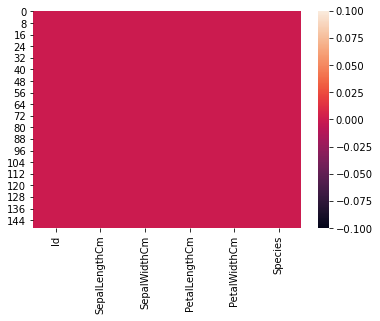

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.describe()  #data summary of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization

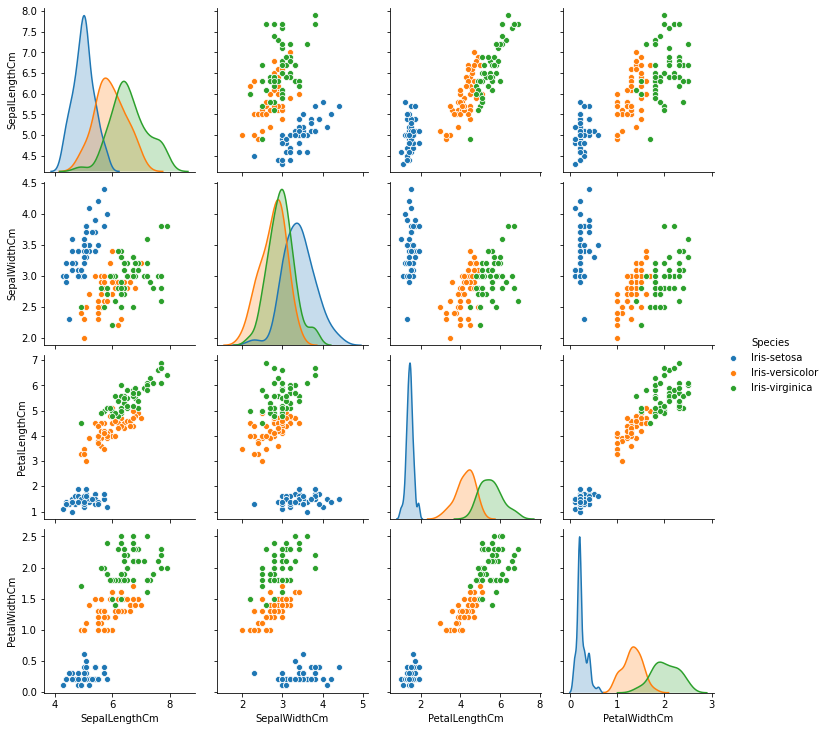

In [18]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='o')
plt.show()

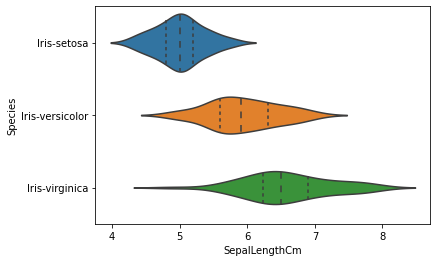

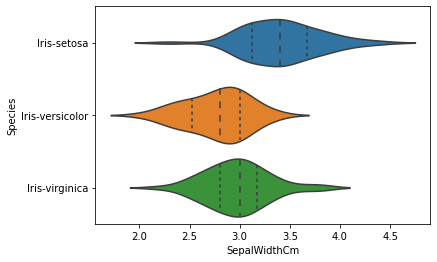

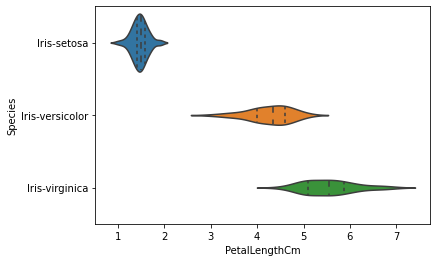

In [27]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()

# Modeling with scikit-learn

In [30]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
#print(X.head())
print(X.shape)
#print(y.head())
print(y.shape)

(150, 4)
(150,)


# Split the dataset into a training set and a testing set

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


# Model of Unsupervised

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

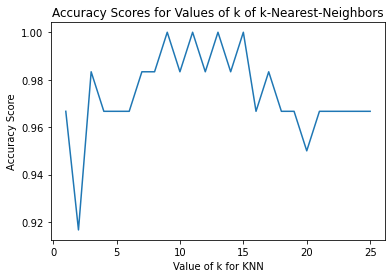

In [41]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [44]:
knn.predict([[5, 58, 4, 2]])

array(['Iris-setosa'], dtype=object)

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667